### Imports

In [1]:
# stable-baselines3, Add Gymnasium support: 
# https://github.com/DLR-RM/stable-baselines3/pull/1327
# pip install git+https://github.com/DLR-RM/stable-baselines3@feat/gymnasium-support

# optional 'chdir' (if not installed via 'pip' -> ModuleNotFoundError)
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import os
print ('current python directory:', os.getcwd())
module_path = './gym_anytrading'
if not os.path.exists(module_path):
    print ("os.chdir('../')")
    os.chdir('../')
    print ('current python directory:', os.getcwd())
    print (f"os.path.exists('{module_path}')", os.path.exists(module_path))
# ------------------------------------------------------------

import gymnasium as gym
import gym_anytrading

import numpy as np
import pandas as pd
import quantstats as qs

from stable_baselines3 import A2C
from stable_baselines3 import PPO
import matplotlib.pyplot as plt

current python directory: /Users/alex/Develop/gymnasium/gym-anytrading/examples
os.chdir('../')
current python directory: /Users/alex/Develop/gymnasium/gym-anytrading
os.path.exists('./gym_anytrading') True


### Create Env

In [2]:
df = gym_anytrading.datasets.STOCKS_GOOGL.copy()

window_size = 10
start_index = window_size
end_index = start_index + 50 #len(df)

env = gym.make(
    'stocks-v0',
    df = df,
    window_size = window_size,
    frame_bound = (start_index, end_index)
)


### Train Env

In [3]:
model = A2C('MlpPolicy', env, verbose=0)
#model = PPO('MlpPolicy', env, verbose=0)
model.learn(total_timesteps=10_000)

### Test Env

In [4]:
vec_env = model.get_env()
obs = vec_env.reset()

action_stats = {0:0, 1:0}

while True:
    action, _states = model.predict(obs, deterministic=True)
    action_stats[action[0]] += 1
    obs, reward, done, info = vec_env.step(action)

    if done: break


print("action_stats:", action_stats)
print("info:", info)
vec_env.close()

action_stats: {0: 49, 1: 0}
info: [{'total_reward': 0.0, 'total_profit': 1.0, 'position': 0, 'episode': {'r': 0.0, 'l': 49, 't': 5.822348}, 'TimeLimit.truncated': False, 'terminal_observation': array([227.092087,   0.760758, 225.795792,  -1.296295, 225.405411,
        -0.390381, 228.778778,   3.373367, 228.533539,  -0.245239,
       227.197205,  -1.336334, 229.519516,   2.322311, 231.371368,
         1.851852, 230.230225,  -1.141143, 222.667664,  -7.562561])}]


### Plot Results

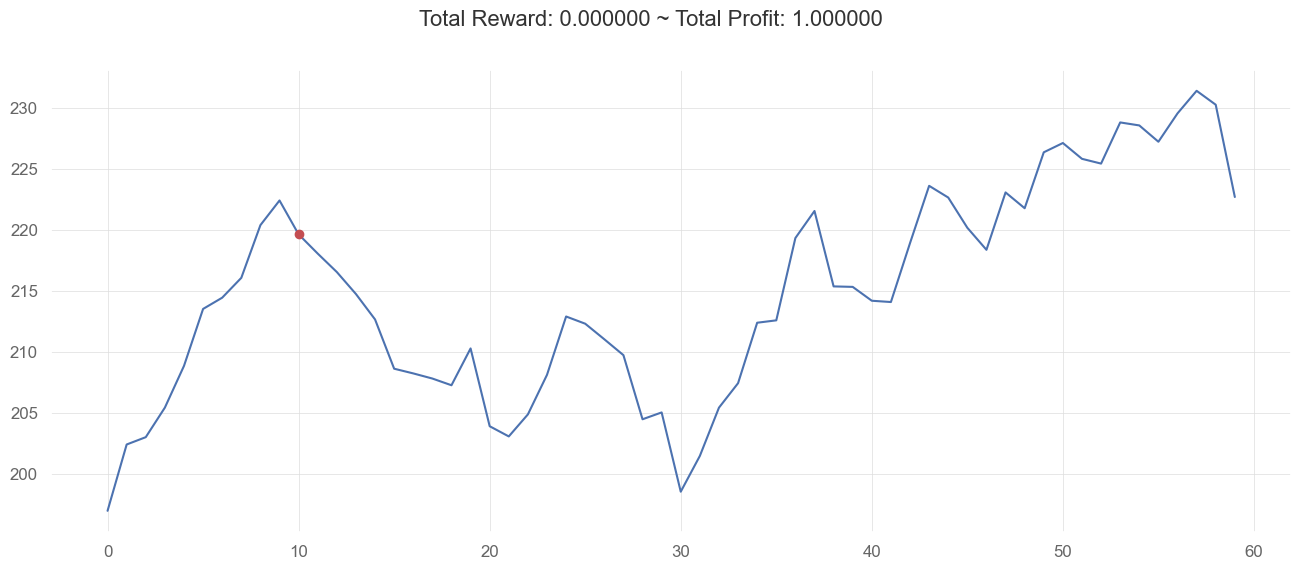

In [7]:
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()

### Analysis Using `quantstats`

In [8]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='SB3_quantstats.html')

KeyError: 'total_profit'